In [1]:
from cell_2170_model import cell_2170
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model Voltage vs SOC curve

In [2]:
# initialize cell model with terminal voltage of 3.3 V
cell_model = cell_2170(initial_voltage=3.3)

output_variables = [
    "Terminal voltage [V]",
    "Current [A]",
    # "Electrolyte concentration [mol.m-3]",
    # "Negative particle surface concentration [mol.m-3]",
    # "Positive particle surface concentration [mol.m-3]",
    "Discharge capacity [A.h]"
]

cell_model.sim_cali.plot(output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=29.762420691349554, step=0.29762420691349556…

In [3]:
cell_model.total_capacity

4.64530747837199

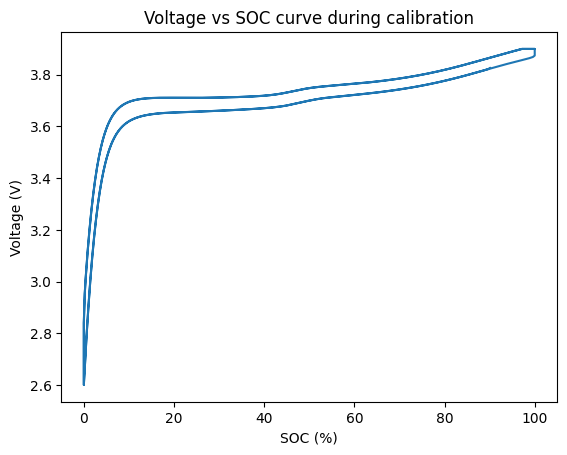

In [4]:
SOC_array = cell_model.cali_capacity_array / cell_model.total_capacity * 100

fig, ax = plt.subplots()
ax.plot(SOC_array, cell_model.cali_v_array)
ax.set_title("Voltage vs SOC curve during calibration")
ax.set_xlabel("SOC (%)")
ax.set_ylabel("Voltage (V)")
plt.show()

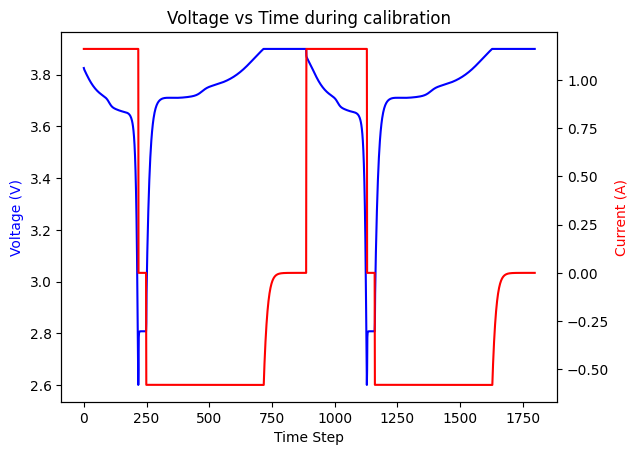

In [5]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(cell_model.cali_v_array, "b-")
ax2.plot(cell_model.cali_i_array, "r-")
ax1.set_title("Voltage vs Time during calibration")
ax1.set_xlabel("Time Step")
ax1.set_ylabel("Voltage (V)", color="b")
ax2.set_ylabel("Current (A)", color="r")
plt.show()

#### Change Y axis to Power

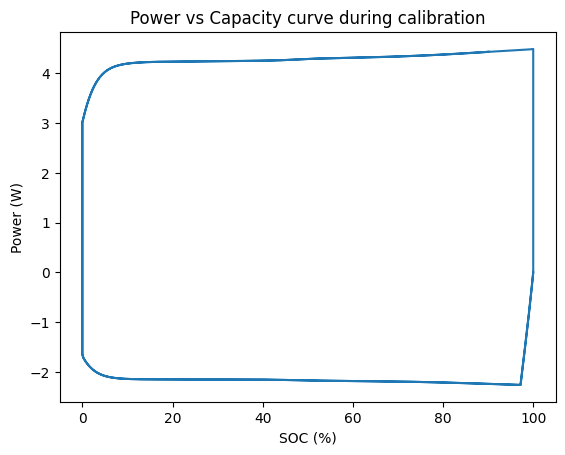

In [6]:
power_array = cell_model.cali_i_array * cell_model.cali_v_array

fig, ax = plt.subplots()
ax.plot(SOC_array, power_array)
ax.set_title("Power vs Capacity curve during calibration")
ax.set_xlabel("SOC (%)")
ax.set_ylabel("Power (W)")
plt.show()

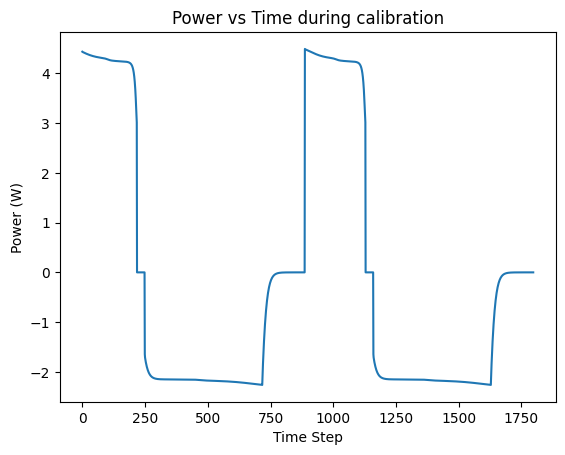

In [7]:
fig, ax = plt.subplots()
ax.plot(power_array)
ax.set_title("Power vs Time during calibration")
ax.set_xlabel("Time Step")
ax.set_ylabel("Power (W)")
plt.show()

In [8]:
cell_model.cali_capacity_array

array([4.18429199, 4.16496832, 4.14564464, ..., 4.64530748, 4.64530748,
       4.64530748])

In [9]:
cell_capacity_array = cell_model.cali_capacity_array.reshape((len(cell_model.cali_capacity_array),1))
cell_v_array = cell_model.cali_v_array.reshape((len(cell_model.cali_v_array),1))
cell_i_array = cell_model.cali_i_array.reshape((len(cell_model.cali_i_array),1))

SOC_array = cell_capacity_array / cell_model.total_capacity
SOC_array = SOC_array.reshape((len(SOC_array),1))

pandas_array = np.concatenate((cell_v_array, cell_i_array, cell_capacity_array, SOC_array), axis=1)

In [10]:
column_values = ['voltage', 'current','capacity', 'SOC']

df_cell = pd.DataFrame(data = pandas_array, 
                       columns = column_values)

In [11]:
df_cell

,voltage,current,capacity,SOC
0,3.826109,1.16,4.184292,0.900757
1,3.821980,1.16,4.164968,0.896597
2,3.819614,1.16,4.145645,0.892437
3,3.817449,1.16,4.126321,0.888277
4,3.815347,1.16,4.106997,0.884117
...,...,...,...,...
1793,3.900000,0.00,4.645307,1.000000
1794,3.900000,0.00,4.645307,1.000000
1795,3.900000,0.00,4.645307,1.000000
1796,3.900000,0.00,4.645307,1.000000


### Assembly of cells for model 3 battery pack
4,416 pcs of 2170 cells:
- 46 cells in parallel (summing capacity) for each group
- 96 groups in series (summing voltage).

In [12]:
df_pack = df_cell

df_pack['voltage'] = df_cell.copy()['voltage'] * 96
df_pack['capacity'] = df_cell.copy()['capacity'] * 46
df_pack['power'] = df_pack['voltage'] * df_pack['current']

df_pack

,voltage,current,capacity,SOC,power
0,367.306499,1.16,192.477431,0.900757,426.075539
1,366.910076,1.16,191.588542,0.896597,425.615688
2,366.682952,1.16,190.699654,0.892437,425.352225
3,366.475064,1.16,189.810765,0.888277,425.111074
4,366.273277,1.16,188.921876,0.884117,424.877002
...,...,...,...,...,...
1793,374.399973,0.00,213.684144,1.000000,0.000000
1794,374.399973,0.00,213.684144,1.000000,0.000000
1795,374.399973,0.00,213.684144,1.000000,0.000000
1796,374.399973,0.00,213.684144,1.000000,0.000000


### Export 2 dataframes out of the df_pack
- df_charging: a whole charging session
- df_dis_charging: a whole dis-charging session

#### drop the dataset's section before the 1st charging session

In [13]:
df_pack.loc[df_pack.index[df_pack['power'] < 0][0]]

voltage     2.726470e+02
current    -5.800000e-01
capacity    3.717915e-12
SOC         1.739911e-14
power      -1.581353e+02
Name: 249, dtype: float64

In [14]:
df_pack_update = df_pack.drop(np.arange(df_pack.index[0], df_pack.index[df_pack['power'] < 0][0]))
df_pack_update

,voltage,current,capacity,SOC,power
249,272.647012,-0.58,3.717915e-12,1.739911e-14,-158.135267
250,283.582578,-0.58,4.448026e-01,2.081589e-03,-164.477895
251,289.369510,-0.58,8.896052e-01,4.163178e-03,-167.834316
252,294.356462,-0.58,1.334408e+00,6.244767e-03,-170.726748
253,298.913783,-0.58,1.779210e+00,8.326356e-03,-173.369994
...,...,...,...,...,...
1793,374.399973,0.00,2.136841e+02,1.000000e+00,0.000000
1794,374.399973,0.00,2.136841e+02,1.000000e+00,0.000000
1795,374.399973,0.00,2.136841e+02,1.000000e+00,0.000000
1796,374.399973,0.00,2.136841e+02,1.000000e+00,0.000000


#### export the charging section exclusively for the 1st charging session

In [15]:
df_pack_update.loc[df_pack_update.index[df_pack_update['power'] == 0][0]]

voltage     374.399978
current       0.000000
capacity    213.681076
SOC           0.999986
power         0.000000
Name: 856, dtype: float64

In [16]:
df_charging = df_pack_update.loc[np.arange(df_pack.index[df_pack['power'] < 0][0], df_pack_update.index[df_pack_update['power'] == 0][0])]
df_charging

,voltage,current,capacity,SOC,power
249,272.647012,-0.580000,3.717915e-12,1.739911e-14,-158.135267
250,283.582578,-0.580000,4.448026e-01,2.081589e-03,-164.477895
251,289.369510,-0.580000,8.896052e-01,4.163178e-03,-167.834316
252,294.356462,-0.580000,1.334408e+00,6.244767e-03,-170.726748
253,298.913783,-0.580000,1.779210e+00,8.326356e-03,-173.369994
...,...,...,...,...,...
851,374.400000,-0.000013,2.136810e+02,9.999855e-01,-0.005008
852,374.400000,-0.000012,2.136811e+02,9.999855e-01,-0.004621
853,374.400000,-0.000011,2.136811e+02,9.999856e-01,-0.004254
854,374.400000,-0.000010,2.136811e+02,9.999856e-01,-0.003912


#### drop the dataset's section before the 2nd dis-charging session

In [17]:
df_pack_update.index[0]

249

In [18]:
df_pack_update = df_pack_update.drop(np.arange(df_pack_update.index[0], df_pack_update.index[df_pack_update['power'] > 0][0]))
df_pack_update

,voltage,current,capacity,SOC,power
887,371.931961,1.16,213.681076,0.999986,431.441075
888,371.399560,1.16,212.792188,0.995826,430.823490
889,371.148854,1.16,211.903299,0.991666,430.532671
890,370.939685,1.16,211.014410,0.987506,430.290034
891,370.748242,1.16,210.125521,0.983346,430.067961
...,...,...,...,...,...
1793,374.399973,0.00,213.684144,1.000000,0.000000
1794,374.399973,0.00,213.684144,1.000000,0.000000
1795,374.399973,0.00,213.684144,1.000000,0.000000
1796,374.399973,0.00,213.684144,1.000000,0.000000


#### export the charging section exclusively for the 2nd charging session

In [19]:
df_dis_charging = df_pack_update.loc[np.arange(df_pack_update.index[df_pack_update['power'] > 0][0], df_pack_update.index[df_pack_update['power'] == 0][0])]
df_dis_charging

,voltage,current,capacity,SOC,power
887,371.931961,1.16,213.681076,0.999986,431.441075
888,371.399560,1.16,212.792188,0.995826,430.823490
889,371.148854,1.16,211.903299,0.991666,430.532671
890,370.939685,1.16,211.014410,0.987506,430.290034
891,370.748242,1.16,210.125521,0.983346,430.067961
...,...,...,...,...,...
1124,287.754979,1.16,3.014410,0.014107,333.795775
1125,277.997883,1.16,2.125521,0.009947,322.477545
1126,267.000637,1.16,1.236632,0.005787,309.720739
1127,254.715436,1.16,0.347743,0.001627,295.469906


### Charging

### From df_charging, construct a model with concave equation

In [20]:
# take out the power drop after the peak of power
df_charging['pos_power'] = - df_charging['power']

max_power_index = df_charging.index[df_charging['pos_power'] == max(df_charging['pos_power'])]

df_charging_partial = df_charging.loc[np.arange(df_charging.index[0], max_power_index.item()+1)]
df_charging_partial

,voltage,current,capacity,SOC,power,pos_power
249,272.647012,-0.580000,3.717915e-12,1.739911e-14,-158.135267,158.135267
250,283.582578,-0.580000,4.448026e-01,2.081589e-03,-164.477895,164.477895
251,289.369510,-0.580000,8.896052e-01,4.163178e-03,-167.834316,167.834316
252,294.356462,-0.580000,1.334408e+00,6.244767e-03,-170.726748,170.726748
253,298.913783,-0.580000,1.779210e+00,8.326356e-03,-173.369994,173.369994
...,...,...,...,...,...,...
713,374.132183,-0.580000,2.063884e+02,9.658573e-01,-216.996666,216.996666
714,374.224806,-0.580000,2.068332e+02,9.679389e-01,-217.050387,217.050387
715,374.318104,-0.580000,2.072780e+02,9.700205e-01,-217.104500,217.104500
716,374.399040,-0.580000,2.076606e+02,9.718109e-01,-217.151443,217.151443


In [21]:
from scipy.optimize import curve_fit

x = df_charging_partial['SOC'].to_numpy()
y = df_charging_partial['pos_power'].to_numpy()

def log_func(x, a, b):
    return a*np.log(x) + b

popt, pcov = curve_fit(log_func, x, y)

popt[0], popt[1]

(3.0279241277839537, 211.40999461849182)

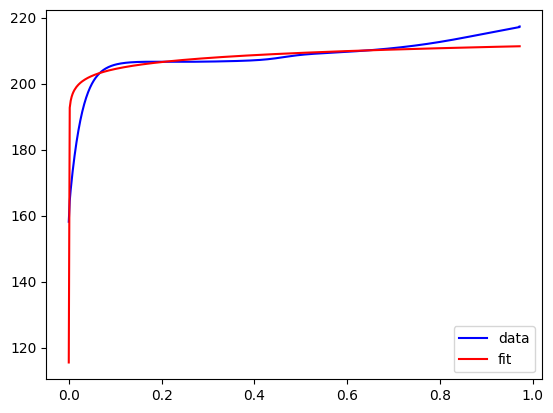

In [22]:
plt.plot(x, y, 'b-', label='data')
plt.plot(x, log_func(x, *popt), 'r-', label='fit')
plt.legend()
plt.show()

### Dis-charging

### From df_dis_charging, construct a model with concave equation

In [23]:
from scipy.optimize import curve_fit

x = df_dis_charging['SOC'].to_numpy()
y = df_dis_charging['power'].to_numpy()

def log_func(x, a, b):
    return a*np.log(x) + b

popt, pcov = curve_fit(log_func, x, y)

popt[0], popt[1]

(14.670817666713885, 425.2261277429361)

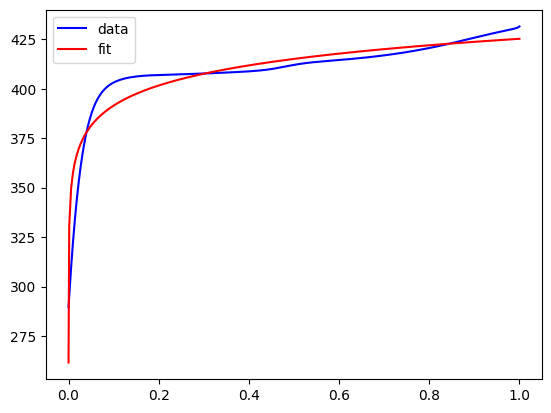

In [24]:
plt.plot(x, y, 'b-', label='data')
plt.plot(x, log_func(x, *popt), 'r-', label='fit')
plt.legend()
plt.show()

### Battery pack dis-charging power limit
$$ P(SOC) = 14.671 log(SOC) + 425.226 $$

### Battery pack charging power limit
$$ P(SOC) = 3.028 log(SOC) + 211.410 $$

### Total Capacity (unit: Ah)

4,416 pcs of 2170 cells:
- 46 cells in parallel (summing capacity) for each group
- 96 groups in series (summing voltage).

In [25]:
cell_model.total_capacity * 46

213.68414400511153